Vamos a realizar una copia del cuaderno del ejemplo del dataset del conjunto de números MNIST en colab.

1. Sobre el archivo de copia se pide realizar las siguientes modificaciones:
2. Divide el conjunto de datos en tres muestras: entrenamiento, validación y test.
3. Prepara los siguientes experimentos variando los hiperparámetros para entrenar la red y medir su rendimiento:
      * Variando el número de neuronas en la capa oculta y/o el número de capas ocultas: prueba con un número menor y otro mayor de neuronas.
      * Variando el número de épocas: prueba con un número menor y otro mayor.
      * Variando la constante de velocidad: prueba con un número menor y otro mayor.
      * Variando el tamaño del lote (mini-batch) de entrenamiento: prueba con un número mayor y otro menor.
      * Usando alguna técnica avanzada: Dropout, Early stopping, Batch Normalization, L1 o L2.NOTA: No hay que probar muchas combinaciones, con unos 10 modelos que combinen las técnicas es suficiente. Se pueden automatizar los entrenamientos.
4. Visualiza los datos en una gráfica y por pantalla de los mejores valores obtenidos en las métricas, los peores y de una configuración que esté en un término medio.
5. En el mismo cuaderno, añade una pequeña discusión de cómo afectan las variaciones de las variaciones de los hiperparámetros a este problema en concreto.
6. Crea un app.py y un requirements.txt para streamlit. Crea un repositorio llamado "digits-mnist-app en GIT, sube los dos archivos anteriores y despliega el proyecto en streamlit con el nombre "digits-mnist-app".

Se deben entregar: el nuevo cuaderno con los experimentos de los nuevos modelos, y los 3 archivos para la app streamlit en un zip o similar.

# División de las muestras en entrenamiento , validación y test

In [8]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input, Dense
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split

# Dividimos el dataset en full train y en test
(x_full_train, y_full_train), (x_test, y_test) = mnist.load_data()
# El full train lo dividimos en train y val
x_train,  x_val, y_train ,y_val = train_test_split(x_full_train , y_full_train ,test_size=10000, random_state=42)

print("Shape:", x_train.shape)
print("Shape:", x_val.shape)
print("Shape:", x_test.shape)

Shape: (50000, 28, 28)
Shape: (10000, 28, 28)
Shape: (10000, 28, 28)


Pasamos los datos a float32 , los normalizamos y aplanamos la matriz a un vector




In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255  # Escalamos a un rango entre 0 y 1
x_test /= 255
x_val /= 255
x_train -= 0.5  # desplazamos el rango a -0.5 y 0.5
x_test -= 0.5
x_val -= 0.5

x_train = x_train.reshape(50000, 784)
x_test = x_test.reshape(10000, 784)
x_val = x_val.reshape(10000,784)

hacemos one hot encoding con las etiquetas

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)  # 10 clases
y_test = keras.utils.to_categorical(y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

# Entrenamiento de los modelos

funcion para crear modelos

In [11]:
def create_model(neurons=128, layers_count=1, learning_rate=0.001, use_dropout=False, use_batchnorm=False):
    model = models.Sequential()
    # Entradas
    model.add(layers.Flatten(input_shape=(784,)))
    # Bucle para crear capas si es que queremos mas de una
    for _ in range(layers_count):
        model.add(layers.Dense(neurons, activation='relu'))
        if use_batchnorm: model.add(layers.BatchNormalization())
        if use_dropout: model.add(layers.Dropout(0.2))
    # Capa de salida con 10 neuronas una por cada clase que hay en el problema
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mse', metrics=['accuracy'])

    return model

Modelos a probar

In [12]:
experimentos = [
    {"name": "Base", "neurons": 20, "epochs": 50, "batch": 30, "lr": 1.0},
    {"name": "Mas_Neuronas", "neurons": 100, "epochs": 50, "batch": 30, "lr": 1.0},
    {"name": "Mas_Capas", "neurons": 128, "layers_count": 3, "epochs": 50, "batch": 30, "lr": 1.0},
    {"name": "Muchos_Epochs", "neurons": 128, "epochs": 100, "batch": 32, "lr": 1.0},
    {"name": "LR_Alta", "neurons": 20, "epochs": 50, "batch": 32, "lr": 0.1},
    {"name": "Batch_Grande", "neurons": 128, "epochs": 50, "batch": 1024, "lr":1.0},
    {"name": "Con_Dropout", "neurons": 256, "epochs": 50, "batch": 64, "lr": 0.001, "use_dropout": True},
    {"name": "Batch_Norm", "neurons": 128, "epochs": 50, "batch": 64, "lr": 0.001, "use_batchnorm": True},
    {"name": "Small_Quick", "neurons": 32, "epochs": 50, "batch": 128, "lr": 0.005},
    {"name": "Deep_Regularized", "neurons": 256, "layers_count": 2, "epochs": 50, "batch": 64, "lr": 0.001, "use_dropout": True, "use_batchnorm": True}
]

In [13]:
resultados = []

for exp in experimentos:
    print(f"Entrenando: {exp['name']}")
    # Creamos el modelo
    model = create_model(
        neurons=exp.get("neurons", 128),
        layers_count=exp.get("layers_count", 1),
        learning_rate=exp.get("lr", 0.001),
        use_dropout=exp.get("use_dropout", False),
        use_batchnorm=exp.get("use_batchnorm", False)
    )
    # Lo entrenamos
    history = model.fit(
        x_train, y_train,
        epochs=exp["epochs"],
        batch_size=exp["batch"],
        validation_data=(x_val, y_val),
        verbose=0
    )
    #Lo evaluamos
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    # lo guardamos en el array resultados para luego poder mostrar los datos con más facilidad
    resultados.append({"Config": exp["name"], "Accuracy": acc})

Entrenando: Base
Entrenando: Mas_Neuronas
Entrenando: Mas_Capas
Entrenando: Muchos_Epochs
Entrenando: LR_Alta
Entrenando: Batch_Grande
Entrenando: Con_Dropout
Entrenando: Batch_Norm
Entrenando: Small_Quick
Entrenando: Deep_Regularized


# Visualiza los datos en una gráfica y por pantalla



             Config  Accuracy
2         Mas_Capas    0.9806
3     Muchos_Epochs    0.9778
1      Mas_Neuronas    0.9767
0              Base    0.9529
5      Batch_Grande    0.9380
4           LR_Alta    0.9366
9  Deep_Regularized    0.8907
7        Batch_Norm    0.8612
8       Small_Quick    0.7327
6       Con_Dropout    0.6401


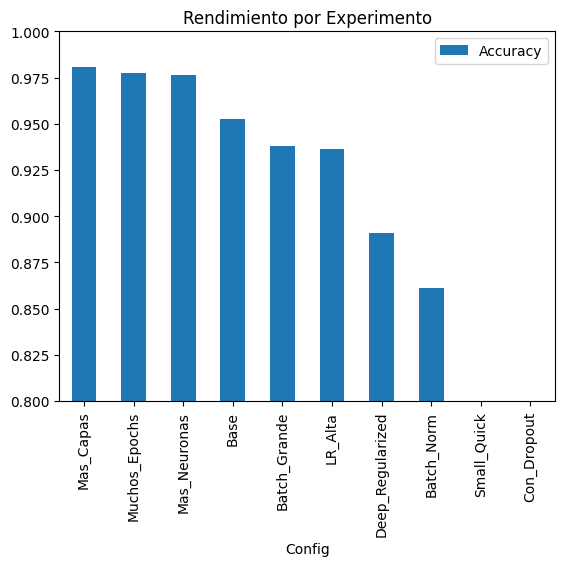

In [14]:
import pandas as pd
df_res = pd.DataFrame(resultados).sort_values(by="Accuracy", ascending=False)
print(df_res)
df_res.plot(kind='bar', x='Config', y='Accuracy', title="Rendimiento por Experimento")
plt.ylim(0.8, 1.0)
plt.show()


--- RESUMEN DE MÉTRICAS ---
Mejor: Mas_Capas con 0.9806
Medio: LR_Alta con 0.9366
Peor: Con_Dropout con 0.6401


/tmp/ipython-input-3509631064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Config', y='Accuracy', data=df_res, palette='viridis')


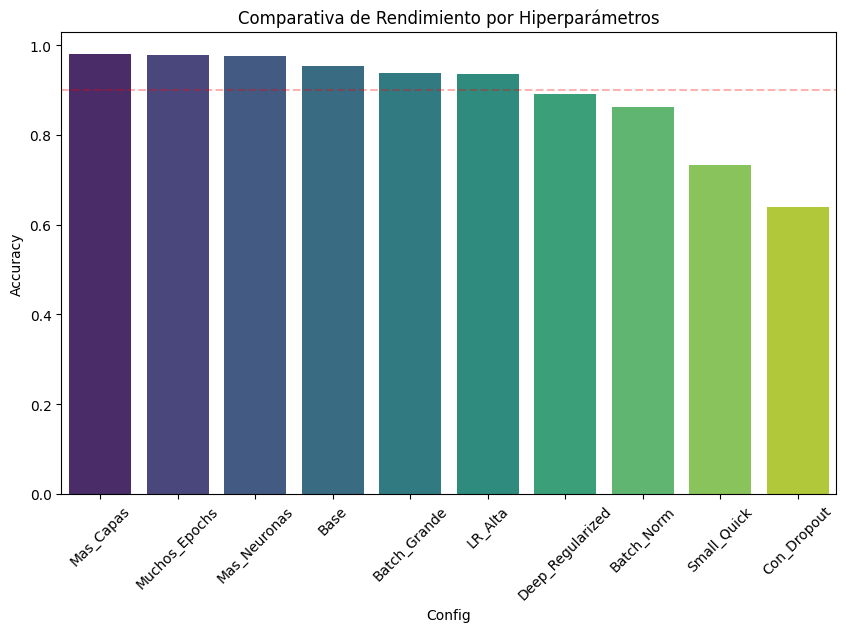

In [15]:
# Identificar configuraciones
mejor = df_res.iloc[0]
peor = df_res.iloc[-1]
medio = df_res.iloc[len(df_res)//2]

print(f"--- RESUMEN DE MÉTRICAS ---")
print(f"Mejor: {mejor['Config']} con {mejor['Accuracy']:.4f}")
print(f"Medio: {medio['Config']} con {medio['Accuracy']:.4f}")
print(f"Peor: {peor['Config']} con {peor['Accuracy']:.4f}")

# Gráfico comparativo
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Config', y='Accuracy', data=df_res, palette='viridis')
plt.xticks(rotation=45)
plt.axhline(0.9, ls='--', color='red', alpha=0.3)
plt.title('Comparativa de Rendimiento por Hiperparámetros')
plt.show()

# Discusion de hiperparametros
El modelo con más capas fue el mejor porque permite a las redes neurinales aprender los números paso a paso de forma más inteligente. Al tener varios niveles la máquina primero identifica líneas sueltas y después las junta para reconocer formas completas como círculos o cruces. Esta estructura organizada permitió que el sistema entendiera mejor la diferencia entre cada número sin perderse en los detalles.

Por el contrario el modelo que usó la técnica de apagado aleatorio fue el que peor funcionó durante las pruebas. Al desactivar partes de la red de forma forzosa el sistema no pudo memorizar bien los trazos básicos que forman cada cifra escrita. Esto demuestra que para este tipo de tareas sencillas es mejor dejar que el ordenador use toda su capacidad en lugar de ponerle trabas innecesarias.

# Descargamos el modelo

In [16]:
# Suponiendo que 'model' es tu configuración de "Mas_Capas"
model.save('best_model.keras')

# Para descargarlo a tu ordenador:
from google.colab import files
files.download('best_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>